**PREDIKSI HARGA CRYPTOCURRENCY ETHEREUM MENGGUNAKAN ALGORITMA DEEP LEARNING.**

**LATAR BELAKANG**



*   Cryptocurrency saat ini telah menjadi trend investasi aset digital yang menarik minat masyarakat karena dapat memberikan keuntungan tinggi.
Salah satu asset crypto terbaik selain bitcoin adalah Ethereum, yg merupakan salah satu uang digital terdesentralisasi, yang pada umumnya disebut dengan Ether / (ETH).
*   Risiko dalam berinvestasi crypto adalah ketidakpastian di masa mendatang karena teknologi crypto yang tergolong masih baru, ditambah fluktuasi harga yang sangat tinggi yang dapat menyulitkan para investor dalam memprediksi naik atau turunnya harga crypto di masa yang akan datang. 
*   Tentunya dalam melakukan suatu prediksi sangat dibutuhkannya suatu analisa dalam menentukan model arsitektur yang tepat agar hasil yang didapatkan bisa seoptimal mungkin.





**DATASET ETH**

Dataset ini diperoleh dari situs website Yahoo Finance dengan kode ETH-USD per November 2017 - September 2022. Tujuannya adalah untuk membuat forecasting data dengan menggunakan algortima deep learning yaitu LSTM dan Bidirectional LSTM terkait harga dari Crytocurrency Ethereum.

**1. IMPORT LIBRARY**

In [1]:
# Library Pendukung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler

# Model Arsitektur Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

# Model Evaluation
import math
from sklearn.metrics import mean_squared_error

# Ignore Warning Notification
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

**2. LOAD DATASET**

In [2]:
eth = pd.read_csv("ETH-30-SEP-2022.csv", engine='python')
eth.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1782,2022-09-26,1294.386108,1335.526367,1282.049316,1335.320190,1335.320190,16034549271
1783,2022-09-27,1335.337036,1396.891479,1308.991455,1330.127686,1330.127686,17870598937
1784,2022-09-28,1329.541382,1351.964478,1267.869263,1337.410889,1337.410889,18994979566
1785,2022-09-29,1337.554443,1348.107666,1293.193359,1335.652344,1335.652344,13796915736
1786,2022-09-30,1335.646484,1368.743408,1320.383179,1327.978638,1327.978638,14250100093


In [3]:
# Memisahkan kolom Date sebagai variabel untuk hari berikutnya
date_df = pd.to_datetime(eth['Date'])

**3. EXPLORATORY DATA ANALYSIS**

**INFORMASI DATASET**

In [4]:
# Informasi Dataset dan Tipe Data
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1787 non-null   object 
 1   Open       1787 non-null   float64
 2   High       1787 non-null   float64
 3   Low        1787 non-null   float64
 4   Close      1787 non-null   float64
 5   Adj Close  1787 non-null   float64
 6   Volume     1787 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.9+ KB


**STATISTIK DESKRIPTIF DATA**

In [5]:
# Statistik Deskriptif Data
eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1.787000e+03
mean,1120.771540,1157.597942,1078.751618,1121.097509,1121.097509,1.302386e+10
std,1217.790651,1255.085058,1174.537770,1217.156478,1217.156478,1.092081e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,207.139893,211.803505,201.895653,207.120842,207.120842,4.226111e+09
50%,462.604004,473.578857,448.640991,462.960541,462.960541,1.092937e+10
75%,1818.302368,1861.165832,1750.569824,1817.460389,1817.460389,1.834015e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


**MENGECEK MISSING VALUE**

In [6]:
# Cek missing value
eth.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**KORELASI ANTAR VARIABEL**

Variabel numerik yang digunakan adalah harga penutupan (close), close dipilih karena mencerminkan semua informasi yang 
terjadi pada pelaku pasar pada saat perdagangan aset kripto tersebut berakhir dan dapat menjadi acuan untuk harga pembukaan (open) dihari berikutnya.

In [7]:
# Nilai Korelasi Variabel
corr_matrix = eth.corr()
corr_matrix['Close'].sort_values(ascending = False)

Close        1.000000
Adj Close    1.000000
Low          0.998934
High         0.998891
Open         0.997810
Volume       0.546393
Name: Close, dtype: float64

**4. DATA PREPARATION**

**TRANSFORMASI DAN SCALING DATA**



*   Merubah tipe data menjadi float32 agar semua data memiliki keseragaman yang sama, dalam hal ini float32 mampu menyimpan data dengan ketelitian 7-8 angka dibelakang koma.


*   Proses normalisasi data menggunakan MinMaxScaller, agar data memiliki range nilai antara 0-1.



In [8]:
# Filter 'Close' colums sebagai numerik variabel

eth = eth.filter(['Close'])
dataset = eth.values
dataset = dataset.astype('float32')

In [9]:
# Normalisasi dataset dengan MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(dataset)
scaled_df = scaler.transform(dataset)
scaled_df

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872746],
       ...,
       [0.26505098],
       [0.264679  ],
       [0.26305592]], dtype=float32)

**DATA SPLITTING**

*Melakukan Split data for training dan testing.*

In [10]:
# Data Splitting

def split_data(eth, timesteps = 1):
    X = []
    Y = []
    for i in range(len(eth)-timesteps-1):
        a = eth[i:(i+timesteps), 0]
        X.append(a)
        Y.append(eth[i + timesteps, 0])
    return np.array(X), np.array(Y)

# Split size data for Training and Testing 
train_size = int(len(eth) * 0.80)
test_size = len(eth) - train_size

# Create shape data 2d 
training_df = scaled_df[0:train_size,:]
testing_df =  scaled_df[train_size:len(eth),:]
 
print('Train Shape = {0}'.format(training_df.shape))
print('Test Shape = {0}'.format(testing_df.shape))

Train Shape = (1429, 1)
Test Shape = (358, 1)


*Merubah format data menjadi: (n_samples, timesteps, n_features) for LSTM n BiLSTM arsitektur.*

In [11]:
# Reshape data kedalam bentuk 3D 

X_train, Y_train = split_data(training_df)
X_test, Y_test = split_data(testing_df)

# Membuat format shape data menjadi : (n_samples x timesteps x n_features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], eth.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], eth.shape[1]))

print('Train Shape = {0}'.format(X_train.shape))
print('Test Shape = {0}'.format(X_test.shape))

Train Shape = (1427, 1, 1)
Test Shape = (356, 1, 1)


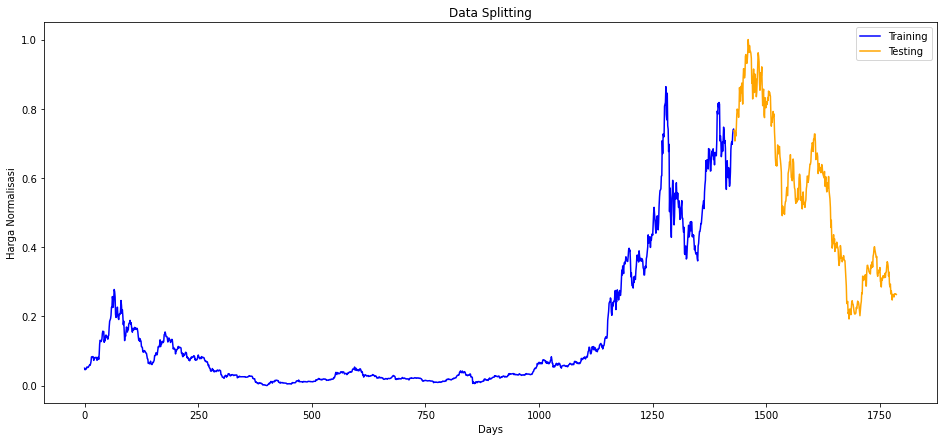

In [12]:
# Plotting Training and Testing data

plt.figure(figsize=(16, 7))

plt.plot(np.arange(training_df.shape[0]), training_df, color='blue', label='Training')

plt.plot(np.arange(training_df.shape[0], training_df.shape[0]+testing_df.shape[0]), testing_df,
         color='orange', label='Testing')

plt.title('Data Splitting')
plt.xlabel('Days')
plt.ylabel('Harga Normalisasi')
plt.legend(loc='best');

**5. MODELING**

**Modeling by LSTM**

*Layer dalam arsitektur Deep Learning secara konvensional terdiri dari layer Input Layer, Hidden Layer dan Output Layer* 

In [13]:
# Default jumlah learning rate untuk adam 0.001
Adam = Adam(learning_rate = 0.001)

In [14]:
# Inisiasi Hyper parameter
# Neuron hidden layer, epoch dan batch size

layers = {'hidden':5}
num_epoch = 15
num_batch = 32

# Inisialisasi layer Algoritma LSTM 
model_LSTM = Sequential()# Urutan Arsitektur
model_LSTM.add(LSTM(4,
                                    activation = 'tanh',
                                    recurrent_activation = 'sigmoid',
                                    return_sequences = True,
                                    input_shape = (X_train.shape[1], X_train.shape[2])))
model_LSTM.add(Dropout(0.1))

model_LSTM.add(LSTM(layers['hidden'],
                                    activation = 'tanh',
                                    recurrent_activation = 'sigmoid',
                                    return_sequences = False))

model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(1, 
                     bias_initializer='zeros'))

In [15]:
# Build model and compile
model_LSTM.compile(optimizer = Adam,
                   loss = 'mse', 
                   metrics=('MAPE')
                  )

# Melatih model dengan menggunakan set data Training
ETH_LSTM = model_LSTM.fit(X_train, Y_train,
                        validation_split=0.1,
                        epochs = num_epoch,
                        batch_size = num_batch,
                        verbose=1)

Epoch 1/15
41/41 [==============================] - 3s 15ms/step - loss: 0.0176 - MAPE: 36645.4219 - val_loss: 0.2328 - val_MAPE: 82.7833
Epoch 2/15
41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - MAPE: 69240.5156 - val_loss: 0.2027 - val_MAPE: 76.8108
Epoch 3/15
41/41 [==============================] - 0s 2ms/step - loss: 0.0133 - MAPE: 73622.5078 - val_loss: 0.1903 - val_MAPE: 74.4266
Epoch 4/15
41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - MAPE: 60697.9922 - val_loss: 0.1727 - val_MAPE: 70.8569
Epoch 5/15
41/41 [==============================] - 0s 3ms/step - loss: 0.0112 - MAPE: 64958.0312 - val_loss: 0.1533 - val_MAPE: 66.7785
Epoch 6/15
41/41 [==============================] - 0s 2ms/step - loss: 0.0099 - MAPE: 48486.4609 - val_loss: 0.1271 - val_MAPE: 60.8151
Epoch 7/15
41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - MAPE: 45856.3008 - val_loss: 0.0918 - val_MAPE: 51.6790
Epoch 8/15
41/41 [======================

**Modeling by Bi-LSTM**

In [16]:
# Hyper parameter
# Neuron hidden layer, jumlah epoch dan batch size


layers = {'hidden':5}
num_epoch = 15
num_batch = 32

# Inisialiasi model algortima BiLSTM
model_BiLSTM = Sequential()
model_BiLSTM.add(Bidirectional(LSTM(4, 
                                    activation = 'tanh',
                                    recurrent_activation = 'sigmoid',
                                    return_sequences = True,
                                    input_shape=(X_train.shape[1], X_train.shape[2]))))
model_BiLSTM.add(Dropout(0.1))

model_BiLSTM.add(Bidirectional(LSTM(layers['hidden'],
                                    activation = 'tanh',
                                    recurrent_activation = 'sigmoid',
                                    return_sequences = False)))

model_BiLSTM.add(Dropout(0.1))
model_BiLSTM.add(Dense(1, 
                       bias_initializer='zeros'))

In [17]:
# Build model compiler
model_BiLSTM.compile(loss='mse', 
                     optimizer=Adam, 
#                    metrics=[RootMeanSquaredError()]
                     metrics=('MAPE')
                    )

# Melatih model dengan menggunakan set data Training
ETH_BiLSTM = model_BiLSTM.fit(X_train, Y_train,
                              validation_split=0.1,
                              epochs= num_epoch, 
                              batch_size= num_batch, 
                              verbose=1)

Epoch 1/15
41/41 [==============================] - 6s 26ms/step - loss: 0.0153 - MAPE: 65493.8203 - val_loss: 0.1767 - val_MAPE: 72.0755
Epoch 2/15
41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - MAPE: 50700.6719 - val_loss: 0.0507 - val_MAPE: 38.8658
Epoch 3/15
41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - MAPE: 11733.5557 - val_loss: 0.0025 - val_MAPE: 6.4811
Epoch 4/15
41/41 [==============================] - 0s 2ms/step - loss: 7.5909e-04 - MAPE: 14599.1865 - val_loss: 0.0019 - val_MAPE: 5.9111
Epoch 5/15
41/41 [==============================] - 0s 2ms/step - loss: 6.4718e-04 - MAPE: 3592.2678 - val_loss: 0.0018 - val_MAPE: 5.6871
Epoch 6/15
41/41 [==============================] - 0s 2ms/step - loss: 8.4778e-04 - MAPE: 14421.3408 - val_loss: 0.0016 - val_MAPE: 5.6284
Epoch 7/15
41/41 [==============================] - 0s 2ms/step - loss: 7.2745e-04 - MAPE: 7844.3584 - val_loss: 0.0022 - val_MAPE: 5.9912
Epoch 8/15
41/41 [=============

**LOSS VISUALIZATION**

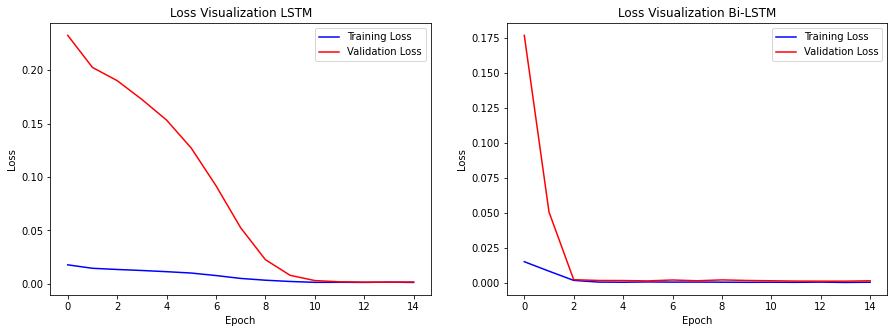

In [18]:
# loss Visualization LSTM n BiLSTM
loss_LSTM = ETH_LSTM.history['loss']
val_loss_LSTM = ETH_LSTM.history['val_loss']
epochs = range(len(loss_LSTM))

loss_BiLSTM = ETH_BiLSTM.history['loss']
val_loss_BiLSTM = ETH_BiLSTM.history['val_loss']
epochs = range(len(loss_BiLSTM))

# Plotting figure            
plt.figure(figsize = (15,5))

# Loss LSTM
plt.subplot(1,2,1)
plt.plot(epochs, loss_LSTM, 'b', label='Training loss')
plt.plot(epochs, val_loss_LSTM, 'r', label='Validation loss')
plt.title("Loss Visualization LSTM")
plt.legend(['Training Loss','Validation Loss'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Loss BiLSTM
plt.subplot(1,2,2)
plt.plot(epochs, loss_BiLSTM, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM, 'r', label='Validation loss')
plt.title("Loss Visualization Bi-LSTM")
plt.legend(['Training Loss','Validation Loss'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**7. MODEL EVALUATION**

In [19]:
# Mendifiniskan data hasil pemodelan LSTM dan BiLSTM 
train_LSTM = model_LSTM.predict(X_train,verbose=0)
test_LSTM = model_LSTM.predict(X_test,verbose=0)
train_BiLSTM = model_BiLSTM.predict(X_train,verbose=0)
test_BiLSTM = model_BiLSTM.predict(X_test,verbose=0)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Hitung RMSE
LSTM_rmse = sqrt(mean_squared_error(Y_test, test_LSTM))
BiLSTM_rmse = sqrt(mean_squared_error(Y_test, test_BiLSTM))

print('LSTM RMSE = ' , round(LSTM_rmse,4))
print('BiLSTM RMSE =',  round(BiLSTM_rmse,4))

LSTM RMSE =  0.0313
BiLSTM RMSE = 0.0305


In [21]:
# Mean Absolute Percentage Error (MAPE)
LSTM_loss = model_LSTM.evaluate(X_test,Y_test)
BiLSTM_loss = model_BiLSTM.evaluate(X_test,Y_test)

12/12 [==============================] - 0s 1ms/step - loss: 9.2890e-04 - MAPE: 4.5819


**LSTM-BiLSTM Forecasting**

12/12 [==============================] - 0s 997us/step


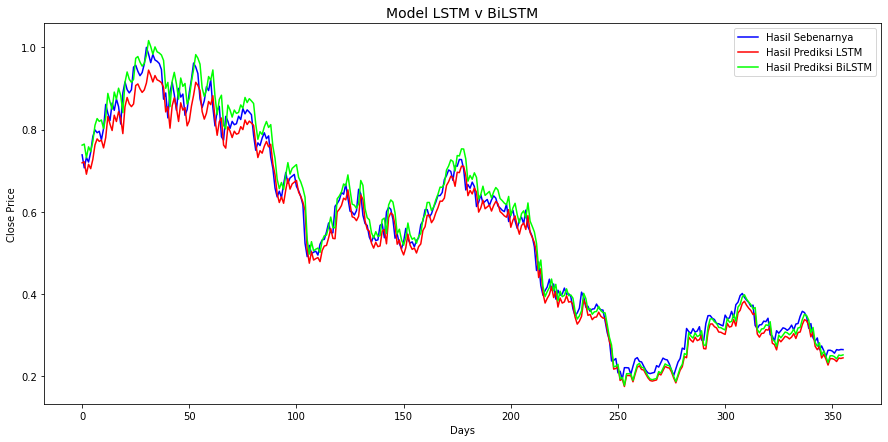

In [22]:
# Visualisasi data by matplotlib

plot_LSTM = model_LSTM.predict(X_test)
plot_BiLSTM = model_BiLSTM.predict(X_test)

plt.figure(figsize=(15,7))
plt.plot(Y_test, color = 'blue', label = 'Hasil Sebenarnya')
plt.plot(plot_LSTM, color = 'red', label = 'Hasil Prediksi LSTM')
plt.plot(plot_BiLSTM, color = 'lime', label = 'Hasil Prediksi BiLSTM')
plt.title('Model LSTM v BiLSTM', fontsize=14)

plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**FUTURE FORECASTING**

In [23]:
# Future Forecasting, Call Model and List date
future_day = 10
dates_period = pd.date_range(list(date_df)[-1], periods=future_day, freq='1d').tolist()
future_model = model_BiLSTM.predict(X_test[-future_day:])

1/1 [==============================] - 0s 13ms/step


In [24]:
# Inverse dan transform data forecast
forecast = np.repeat(future_model,X_test.shape[2],axis=1)
target = scaler.inverse_transform(forecast)[:,0]

forecast.shape

(10, 1)

In [25]:
# Create future forecast
forecast_future = []
for time_i in dates_period:
    forecast_future.append(time_i.date())
    len(forecast_future)
    
forecast_df= pd.DataFrame({'Date':np.array(forecast_future), 'Close':target})
forecast_df['Date']=pd.to_datetime(forecast_df['Date'])

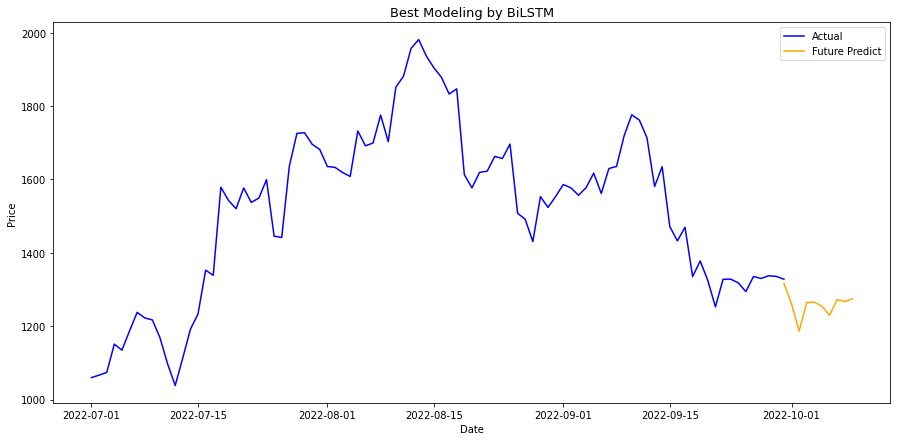

In [26]:
# Plotting data aktual dan hasil prediksi
eth = pd.read_csv("ETH-30-SEP-2022.csv")
actual = eth[['Date', 'Close']]
actual['Date']=pd.to_datetime(actual['Date'])
actual = actual.loc[actual['Date'] >= '2022-07-01'] # Year-Month-Day

# PLot Data
plt.figure(figsize=(15,7))
plt.plot(actual['Date'], actual['Close'], label='Actual', color='b')
plt.plot(forecast_df['Date'], forecast_df['Close'], label='Future Predict', color='orange')
plt.title('Best Modeling by BiLSTM', fontsize=13)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

In [27]:
# Save data hasil prediksi
forecast_df = forecast_df.set_index('Date')
forecast_df.to_csv('FUTURE_DATAFRAME.csv')

In [28]:
# Select attribut forecast for data comparison
forecast_df = forecast_df.filter(['Close'])
predict = forecast_df.values
predict = predict.astype('float32')

In [29]:
# Read and select attribut actual for data comparison
original_df = pd.read_csv("ETH-OKT-10DAY.csv")
original_df = original_df.filter(['Close'])
ori = original_df.values
ori = ori.astype('float32')

In [30]:
# Create new df ori n predict
actual = pd.DataFrame(ori)
f_forecast = pd.DataFrame(predict)

In [31]:
# Menyatukan df Actual n Future Forecast
df_final = pd.concat([actual, f_forecast], axis=1)
df_final.columns = ['Aktual', 'Prediksi']
df_final.head()

,Aktual,Prediksi
0,1311.644409,1316.764282
1,1276.093506,1261.166870
2,1323.439209,1186.615845
3,1362.126587,1264.600830
4,1352.837158,1265.205200


In [32]:
# Evaluation result Actual v Future Forecast with MAPE
from sklearn.metrics import mean_absolute_percentage_error

MAPE = (mean_absolute_percentage_error(ori, predict))

print('Nilai MAPE = ' ,(MAPE))

Nilai MAPE =  0.049178828


**CONCLUSION**

Peramalan yang optimal dapat dilihat berdasarkan tingkat kesalahan error model dari RMSE dan MAPE, dalam pengujian ini baik model LSTM / BiLSTM keduanya termasuk kedalam pemodelan yang optimal dalam memprediksi harga Ethreum, namun keduanya memiliki perbedaan tingkat akurasi, perbedaan tingkat akurasi ini nantinya dapat dijadikan sebagai perbandingan untuk mengetahui model mana yang terbaik berdasarkan banyaknya dilakukan pengujian dengan parameter yang berbeda disetiap pengujiannya.